In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-happiness/2015.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.shape

(158, 12)

In [7]:
df.rename(columns={'Country' : 'ulke', 
                     'Region'  : 'bolge', 
                     'Happiness Rank'   : 'mutlulukSiralamasi', 
                     'Happiness Score'   : 'mutlulukSkoru', 
                     'Standard Error': 'standartSapma', 
                     'Economy (GDP per Capita)': 'ekonomi', 
                     'Family'  : 'aile', 
                     'Health (Life Expectancy)'   : 'yasamSuresi', 
                     'Freedom' : 'ozgurluk',
                     'Trust (Government Corruption)'  : 'guven', 
                     'Generosity': 'comertlik', 
                     'Dystopia Residual'  : 'baski',}, inplace=True)

In [8]:
df.head()

,ulke,bolge,mutlulukSiralamasi,mutlulukSkoru,standartSapma,ekonomi,aile,yasamSuresi,ozgurluk,guven,comertlik,baski
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [9]:
df.isnull().sum()

ulke                  0
bolge                 0
mutlulukSiralamasi    0
mutlulukSkoru         0
standartSapma         0
ekonomi               0
aile                  0
yasamSuresi           0
ozgurluk              0
guven                 0
comertlik             0
baski                 0
dtype: int64

In [10]:
df.nunique()

ulke                  158
bolge                  10
mutlulukSiralamasi    157
mutlulukSkoru         157
standartSapma         153
ekonomi               158
aile                  158
yasamSuresi           157
ozgurluk              158
guven                 157
comertlik             158
baski                 158
dtype: int64

In [11]:
df["ulke"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [12]:
df["bolge"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [13]:
def plotHistogram(degisken):
    plt.figure(figsize=(12,2))
    plt.hist(df[degisken], bins=85, color = "red")
    plt.xlabel(degisken)
    plt.ylabel("Frekans")
    plt.show()

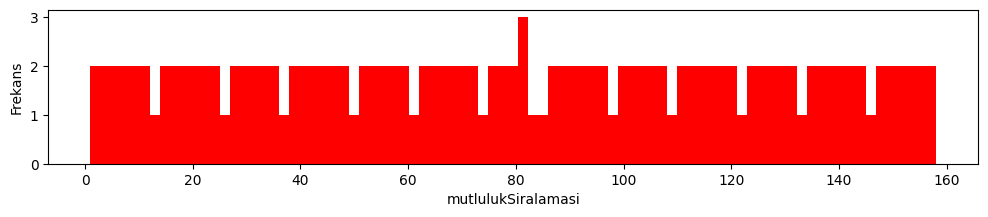

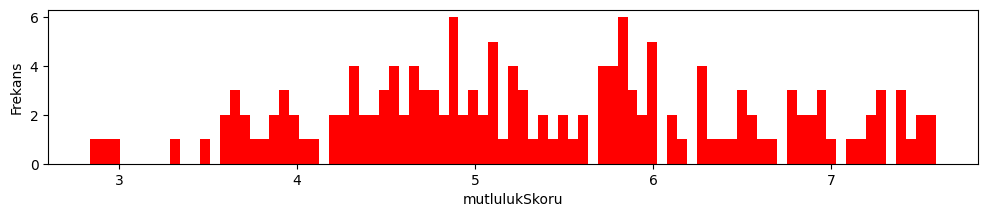

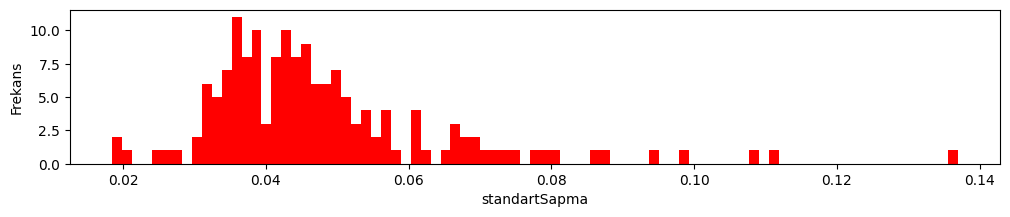

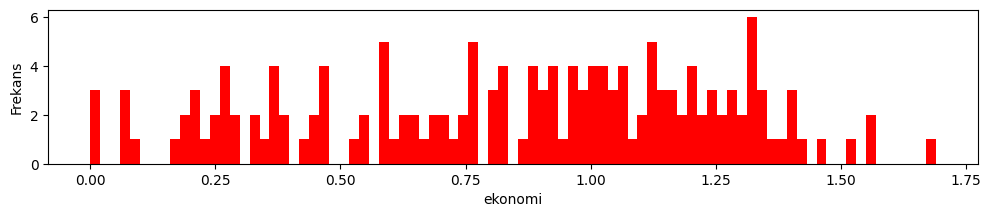

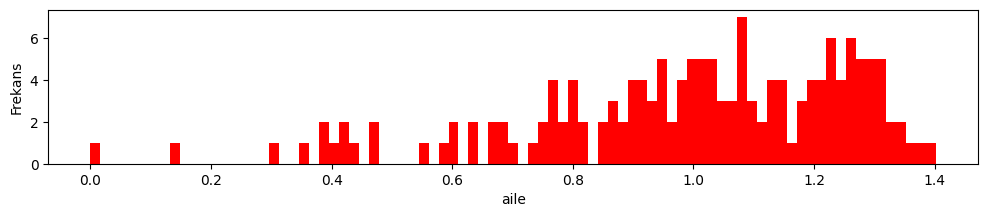

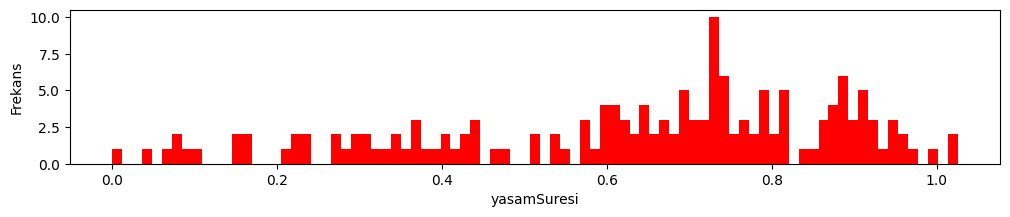

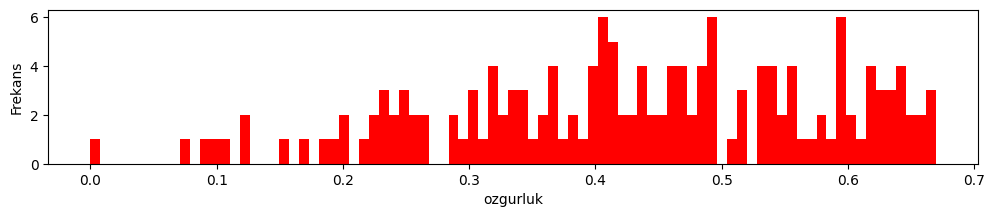

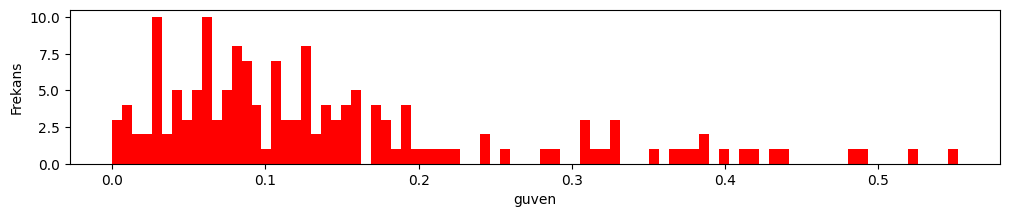

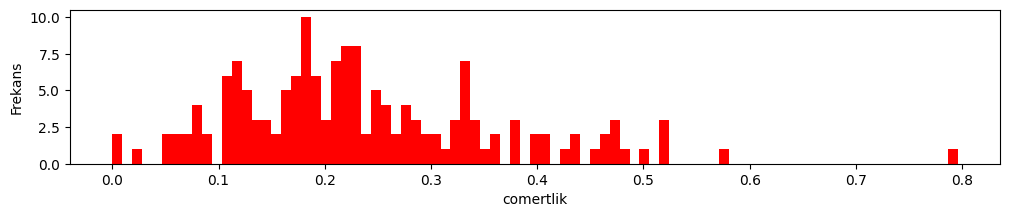

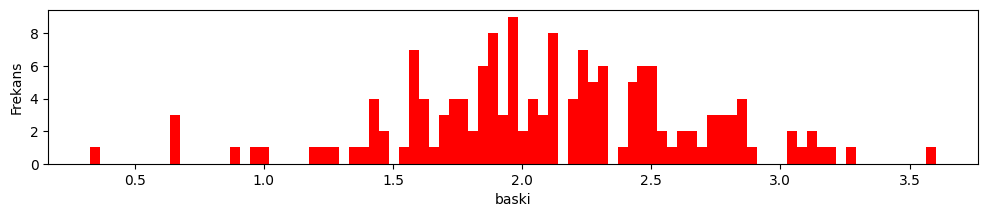

In [14]:
numerical_df = ["mutlulukSiralamasi","mutlulukSkoru","standartSapma",
              "ekonomi", "aile", "yasamSuresi", "ozgurluk", "guven",
              "comertlik", "baski"
              ]

for i in numerical_df:
    plotHistogram(i)

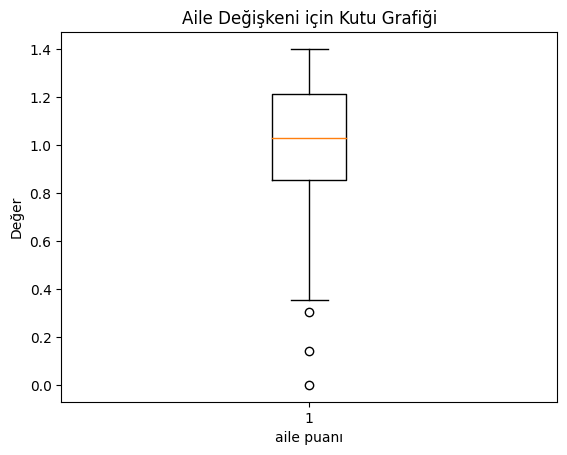

In [15]:
plt.boxplot(df.aile)
plt.title("Aile Değişkeni için Kutu Grafiği")
plt.xlabel("aile puanı")
plt.ylabel("Değer")
plt.show()

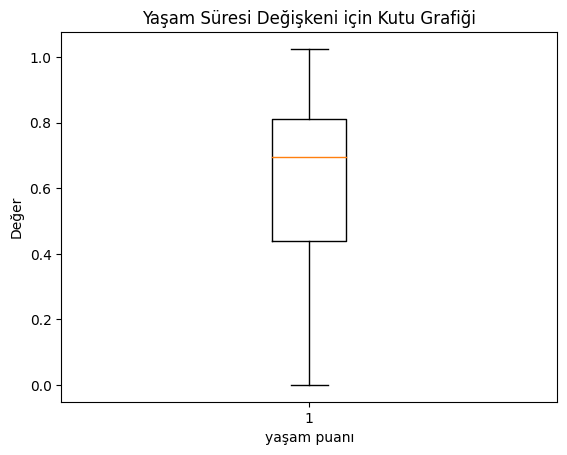

In [16]:
plt.boxplot(df.yasamSuresi)
plt.title("Yaşam Süresi Değişkeni için Kutu Grafiği")
plt.xlabel("yaşam puanı")
plt.ylabel("Değer")
plt.show()

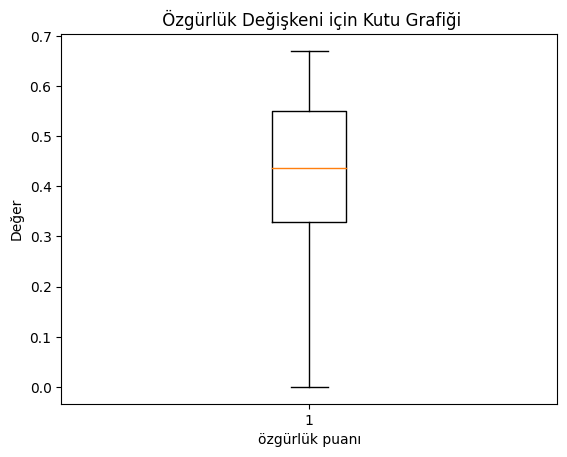

In [17]:
plt.boxplot(df.ozgurluk)
plt.title(" Özgürlük Değişkeni için Kutu Grafiği")
plt.xlabel("özgürlük puanı")
plt.ylabel("Değer")
plt.show()

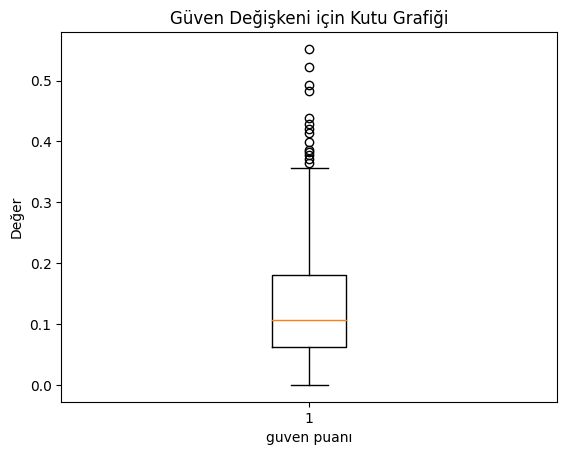

In [18]:
plt.boxplot(df.guven)
plt.title("Güven Değişkeni için Kutu Grafiği")
plt.xlabel("guven puanı")
plt.ylabel("Değer")
plt.show()

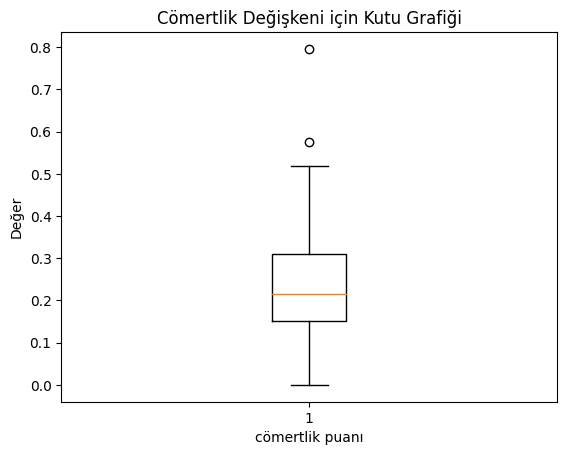

In [19]:
plt.boxplot(df.comertlik)
plt.title("Cömertlik Değişkeni için Kutu Grafiği")
plt.xlabel("cömertlik puanı")
plt.ylabel("Değer")
plt.show()

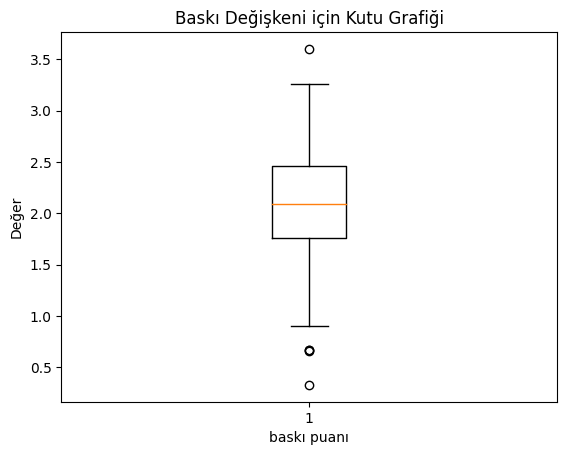

In [20]:
plt.boxplot(df.baski)
plt.title("Baskı Değişkeni için Kutu Grafiği")
plt.xlabel("baskı puanı")
plt.ylabel("Değer")
plt.show()

In [21]:
numeric_correlataion = df.iloc[:,2:].corr()

<Axes: >

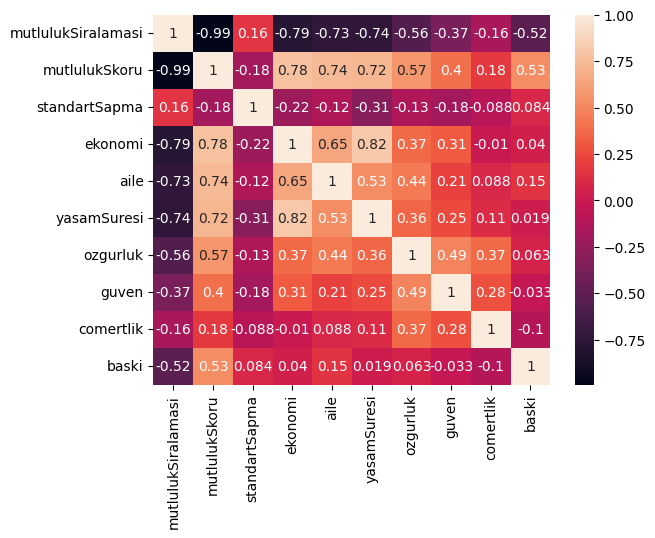

In [22]:
import seaborn as sns
sns.heatmap(numeric_correlataion,annot = True)

In [23]:
def plotBar(df, degisken, n=5):
    df_temp = df[degisken].value_counts()
    df_count = df_temp[:n]  

    plt.figure(figsize=(10, 6))
    plt.bar(df_count.index, df_count, color="blue")
    plt.xticks(rotation=30)
    plt.ylabel("Frekans")
    plt.title(f"Veri Sıklığı: {degisken}")
    plt.show()

    print(f"{degisken}: \n{df_count}")

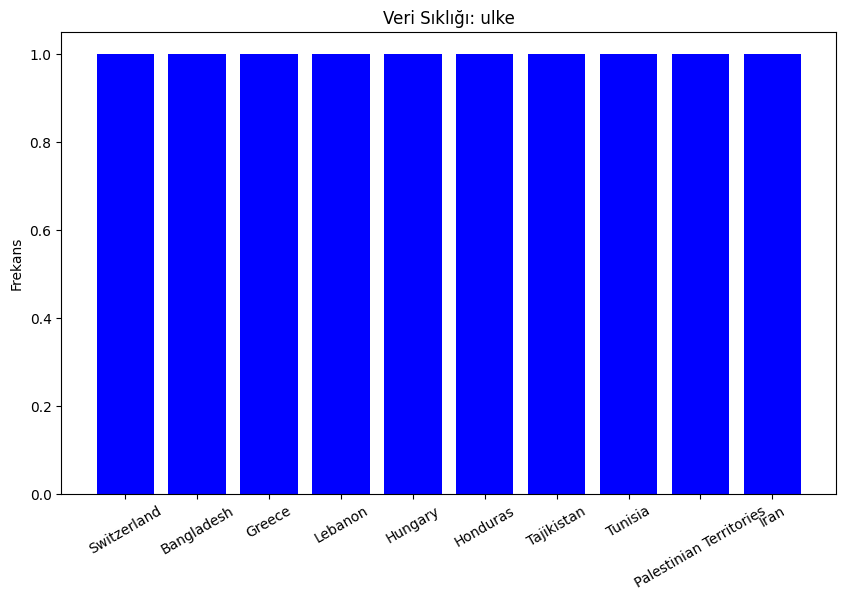

ulke: 
ulke
Switzerland                1
Bangladesh                 1
Greece                     1
Lebanon                    1
Hungary                    1
Honduras                   1
Tajikistan                 1
Tunisia                    1
Palestinian Territories    1
Iran                       1
Name: count, dtype: int64


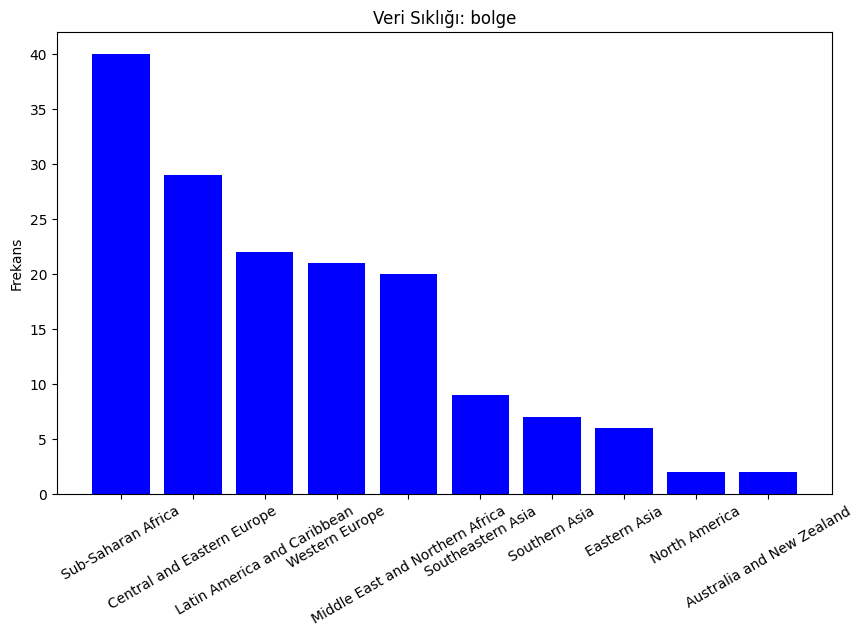

bolge: 
bolge
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


In [24]:
categorical_col = ["ulke", "bolge"]
for col in categorical_col:
    plotBar(df, col, n=10) 

In [25]:
new_df = df.copy()

In [26]:
region_summary = new_df.groupby("bolge")["mutlulukSkoru"].agg(["mean", "median", "count"])

In [27]:
region_summary.head(10)

,mean,median,count
bolge,,,
Australia and New Zealand,7.285000,7.285,2
Central and Eastern Europe,5.332931,5.286,29
Eastern Asia,5.626167,5.729,6
Latin America and Caribbean,6.144682,6.149,22
Middle East and Northern Africa,5.406900,5.262,20
North America,7.273000,7.273,2
Southeastern Asia,5.317444,5.360,9
Southern Asia,4.580857,4.565,7
Sub-Saharan Africa,4.202800,4.272,40


In [28]:
pivot_table = new_df.pivot_table(values=["mutlulukSkoru", "ekonomi"], index="bolge", aggfunc="mean")
print(pivot_table)

                                  ekonomi  mutlulukSkoru
bolge                                                   
Australia and New Zealand        1.291880       7.285000
Central and Eastern Europe       0.942438       5.332931
Eastern Asia                     1.151780       5.626167
Latin America and Caribbean      0.876815       6.144682
Middle East and Northern Africa  1.066974       5.406900
North America                    1.360400       7.273000
Southeastern Asia                0.789054       5.317444
Southern Asia                    0.560486       4.580857
Sub-Saharan Africa               0.380473       4.202800
Western Europe                   1.298596       6.689619


In [29]:
pivot_table2 = new_df.pivot_table(values = ["aile","guven","comertlik","baski"], index = "bolge",
                aggfunc = {"aile" : np.mean, "guven" : np.mean, "comertlik" : np.mean, "baski" : np.mean})

pivot_table2.head(10)

,aile,baski,comertlik,guven
bolge,,,,
Australia and New Zealand,1.314450,2.265355,0.455315,0.392795
Central and Eastern Europe,1.053042,2.021400,0.152264,0.086674
Eastern Asia,1.099427,1.681607,0.225885,0.127695
Latin America and Caribbean,1.104720,2.622577,0.217788,0.117172
Middle East and Northern Africa,0.920490,1.980008,0.190376,0.181702
North America,1.284860,2.480935,0.429580,0.244235
Southeastern Asia,0.940468,1.783020,0.419261,0.151276
Southern Asia,0.645321,2.016769,0.341429,0.102536
Sub-Saharan Africa,0.809085,2.019980,0.221137,0.123878


In [30]:
from collections import Counter

def outlierDetect(new_df, ozellik = ["aile","guven","comertlik","baski"]):
    outlier_indices = []
    for c in ozellik:
        if c in new_df.columns and np.issubdtype(new_df[c].dtype, np.number):
            q1 = np.percentile(new_df[c].dropna(),25)
            q3 = np.percentile(new_df[c].dropna(),75)
            iqr = q3 - q1
            outlier_step = 1.5 * iqr
            üst_sinir = q3 + outlier_step
            alt_sinir = q1 - outlier_step
            outlier_col_list = new_df[(new_df[c] < alt_sinir) | (new_df[c] > üst_sinir)].index
            outlier_indices.extend(outlier_col_list)


    outlier_indices = Counter(outlier_indices)

    outliers = list(i for i, v in outlier_indices.items() if v > 1)
    return outliers

In [31]:
data_outlier = new_df.loc[outlierDetect(new_df, ["aile","guven","comertlik","baski"])]

In [32]:
data_outlier

,ulke,bolge,mutlulukSiralamasi,mutlulukSkoru,standartSapma,ekonomi,aile,yasamSuresi,ozgurluk,guven,comertlik,baski
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042


In [33]:
anomali_aile = data_outlier.aile.value_counts()
anomali_guven = data_outlier.guven.value_counts()
anomali_comertlik = data_outlier.comertlik.value_counts()
anomali_baski = data_outlier.baski.value_counts()

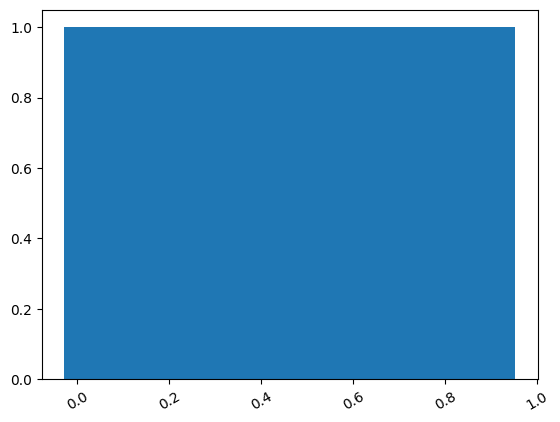

In [34]:
plt.figure()
plt.bar(anomali_guven.index, anomali_guven.values)
plt.xticks(rotation=30)
plt.show()

In [35]:
anomali_index_list = data_outlier.index.tolist()
veri_cleaned = new_df.drop(index=anomali_index_list)

In [36]:
veri_cleaned.iloc[71:72,:]

,ulke,bolge,mutlulukSiralamasi,mutlulukSkoru,standartSapma,ekonomi,aile,yasamSuresi,ozgurluk,guven,comertlik,baski
72,Estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.0868,1.58782
